Cardiovascular diseases are one of the leading causes of deaths globally. To identify the causes and develop a system to predict potential heart attacks in an effective manner is necessary. The data presented has all the information about relevant factors that might have an impact on cardiovascular health. The data needs to be studied in detail for further analysis.
There is one dataset data that has 14 attributes with more than 4000 data points.
You are required to determine and examine the factors that play a significant role in increasing the rate of heart attacks. Also, use the findings to create and predict a model.

Importing, Understanding, and Inspecting Data:
1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.
2. Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.
3. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.


In [284]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plot;
import seaborn as snb;

In [286]:
#loading the excel file to the pandas and inspecting the data using the info and describe functions

df= pd.read_excel('data.xlsx')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [289]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [291]:
df.shape

(303, 14)

In [293]:
#check for the null values To check Coloumn wise Nulls
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [594]:
df.fillna(df.median(), inplace=True)  # For numeric columns

In [295]:
#unqiue values
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [297]:
#Checking duplicate row
df.duplicated().sum()

1

In [299]:
#To check the total duplicate rows with values
duplicated_data=df[df.duplicated(keep=False)]
duplicated_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [301]:
print(df.shape)
df.drop_duplicates(inplace=True)

(303, 14)


In [305]:
print(df.shape)

(302, 14)


In [307]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


4. Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.
5. Study the occurrence of CVD across different ages.
6. Can we detect heart attack based on anomalies in resting blood pressure of the patient?
7. Study the composition of overall patients w.r.t . gender

In [323]:
#target column
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

Text(0.5, 1.0, 'Disease')

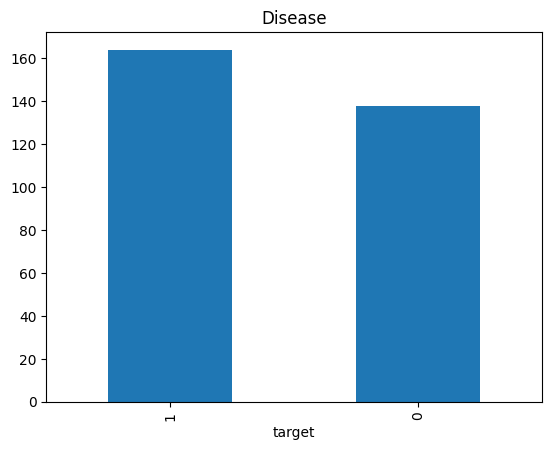

In [329]:
#EDA on heart attracts and non-heart attracts
df['target'].value_counts().plot(kind='bar')
plot.title('Disease')


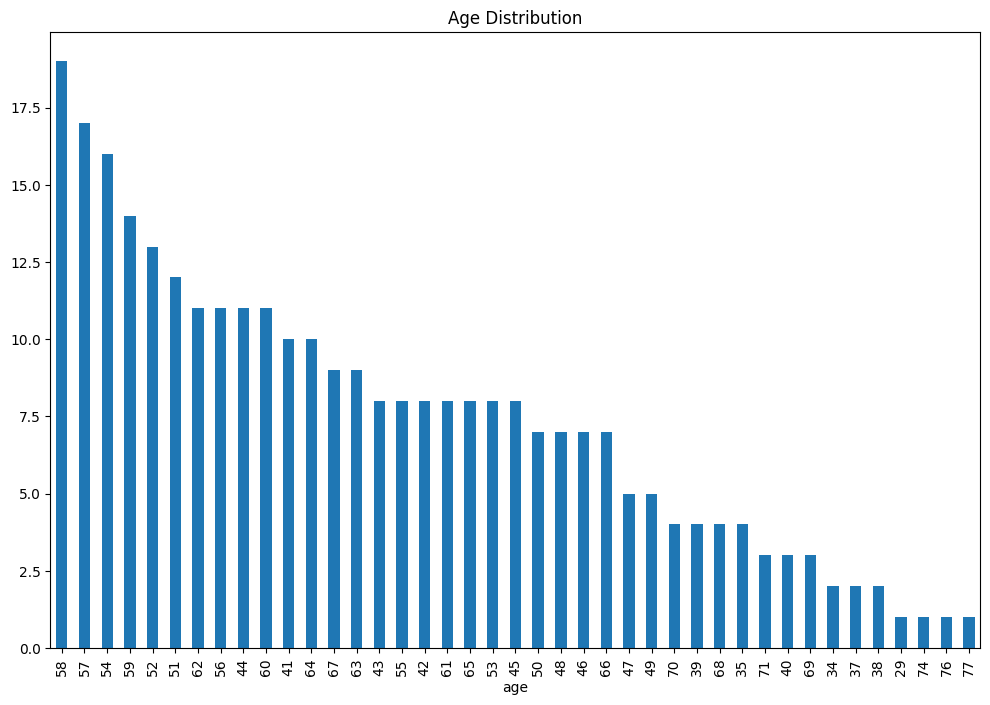

In [351]:
#Distribution of Age
plot.figure(figsize=(12,8))
df['age'].value_counts().plot(kind='bar')
plot.title('Age Distribution')
plot.show()

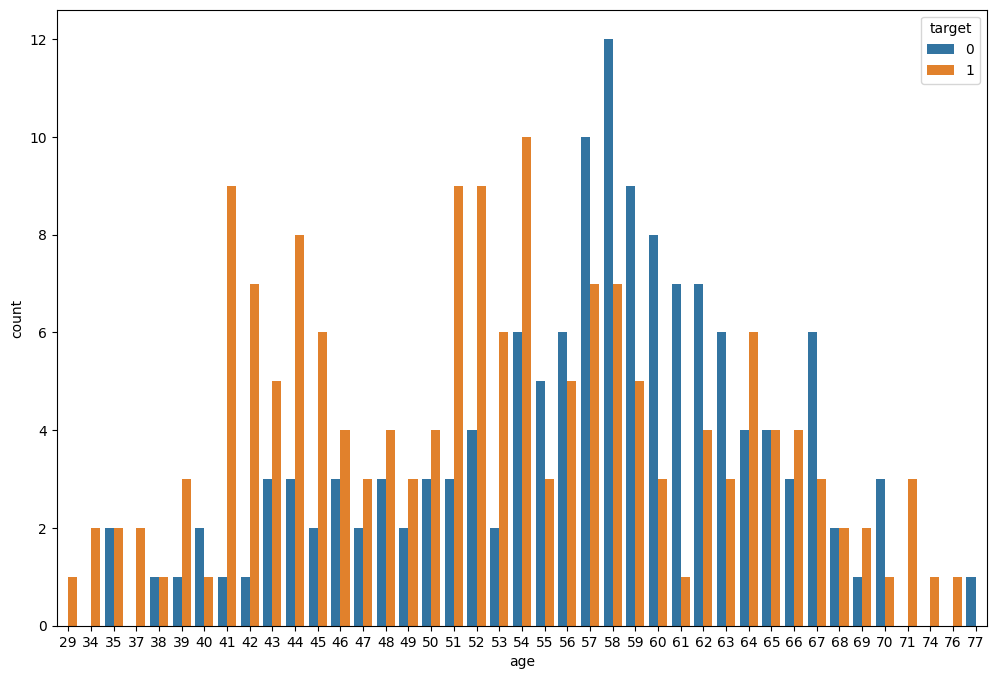

In [395]:
#age with diseased and undiseased using target variable(To analyzie which age has the highest number got effect and which age has the least effected disease
plot.figure(figsize=(12,8))
snb.countplot(x=df['age'],hue='target',data=df)
plot.show()

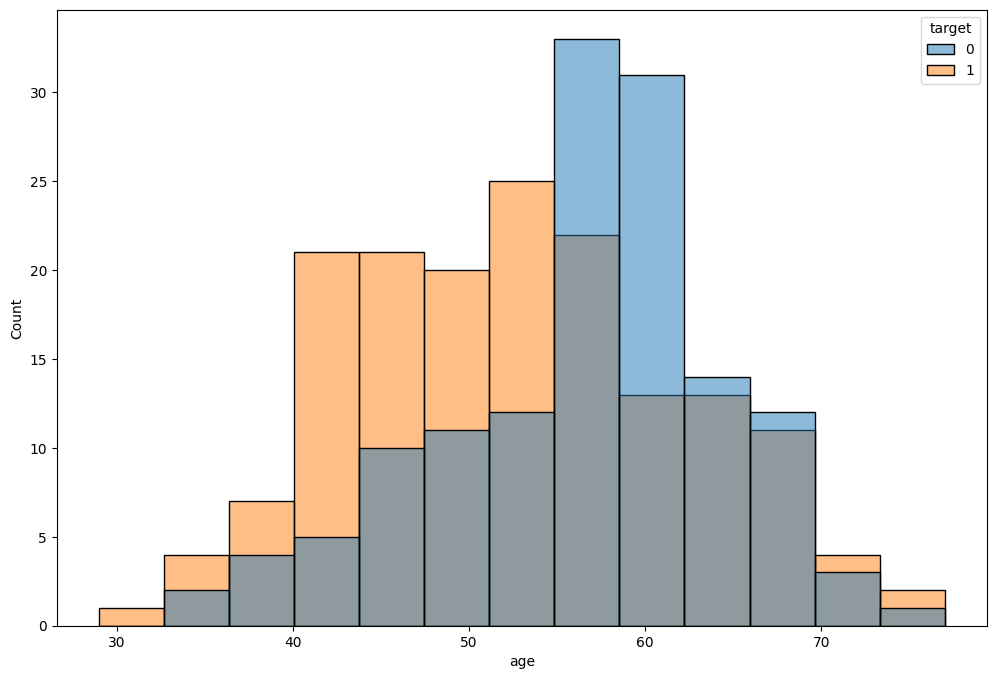

In [397]:
#to show the age in terms of age to easy identify which age group has more effected
plot.figure(figsize=(12,8))
snb.histplot(x=df['age'],hue='target',data=df)
plot.show()

In [415]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [423]:
print(df['sex'].value_counts())

sex
1    206
0     96
Name: count, dtype: int64


<Axes: xlabel='sex'>

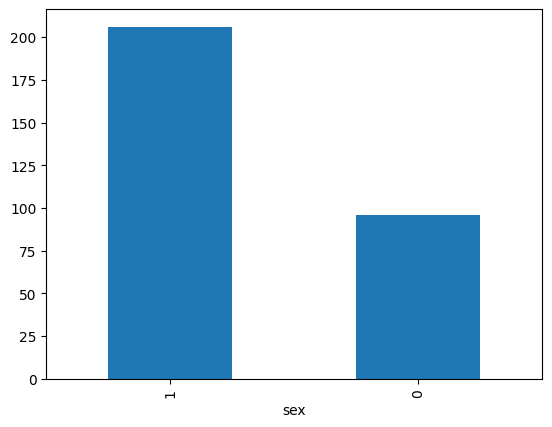

In [425]:
df['sex'].value_counts().plot(kind='bar')

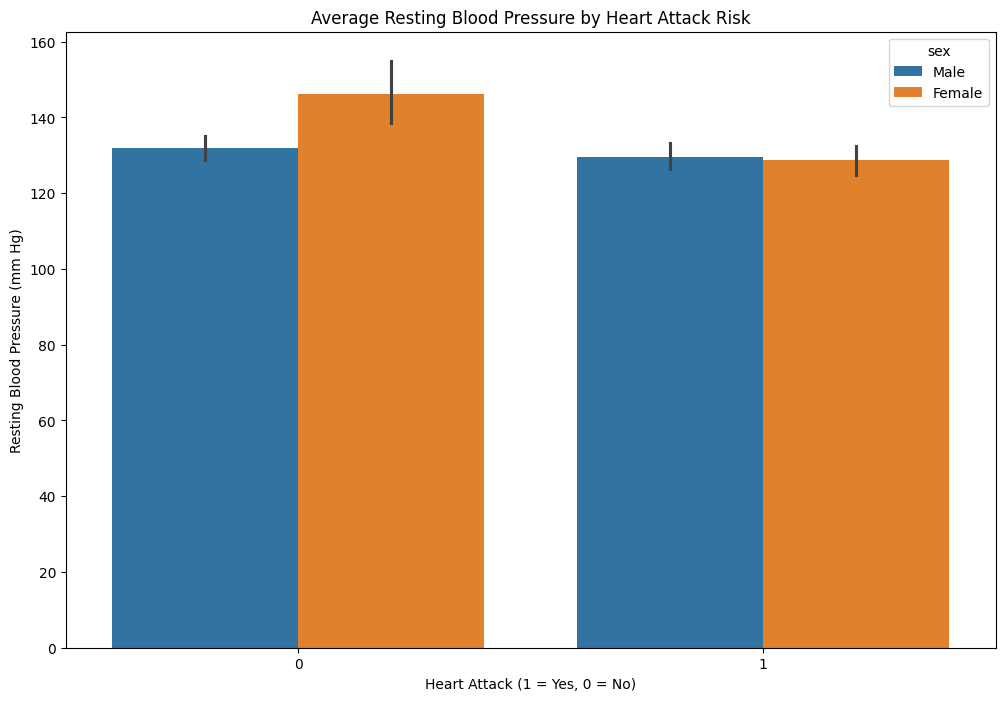

In [459]:
#Can we detect heart attack based on anomalies in resting blood pressure of the patient along with Gender
plot.figure(figsize=(12,8))
snb.barplot(data=df, x='target', y='trestbps', hue=df['sex'].map({1:"Male", 0:"Female"}))
plot.title('Average Resting Blood Pressure by Heart Attack Risk')
plot.xlabel('Heart Attack (1 = Yes, 0 = No)')
plot.ylabel('Resting Blood Pressure (mm Hg)')
plot.show()

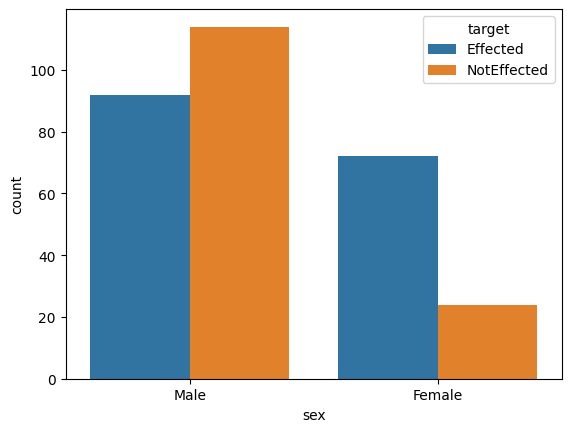

In [435]:
snb.countplot(x=df['sex'].map({1:"Male", 0:"Female"}), hue=df['target'].map({1:"Effected", 0:"NotEffected"}), data=df)
plot.show()
#By analysizing males are more effected Than females and if we analyize deeper 

In [463]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [465]:
#zero type chest pain has the hight cause

df['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

<Axes: xlabel='cp'>

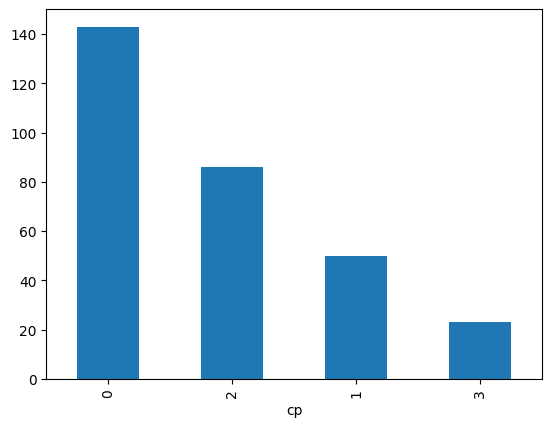

In [475]:
df['cp'].value_counts().plot(kind='bar')


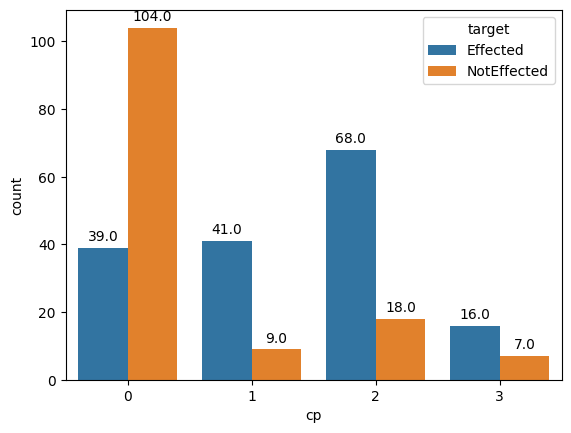

In [481]:
ax=snb.countplot(x=df['cp'], hue=df['target'].map({1:"Effected", 0:"NotEffected"}), data=df)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)
plot.show()

by seeing above graph in cp 2 has the hightest effects with 68 people

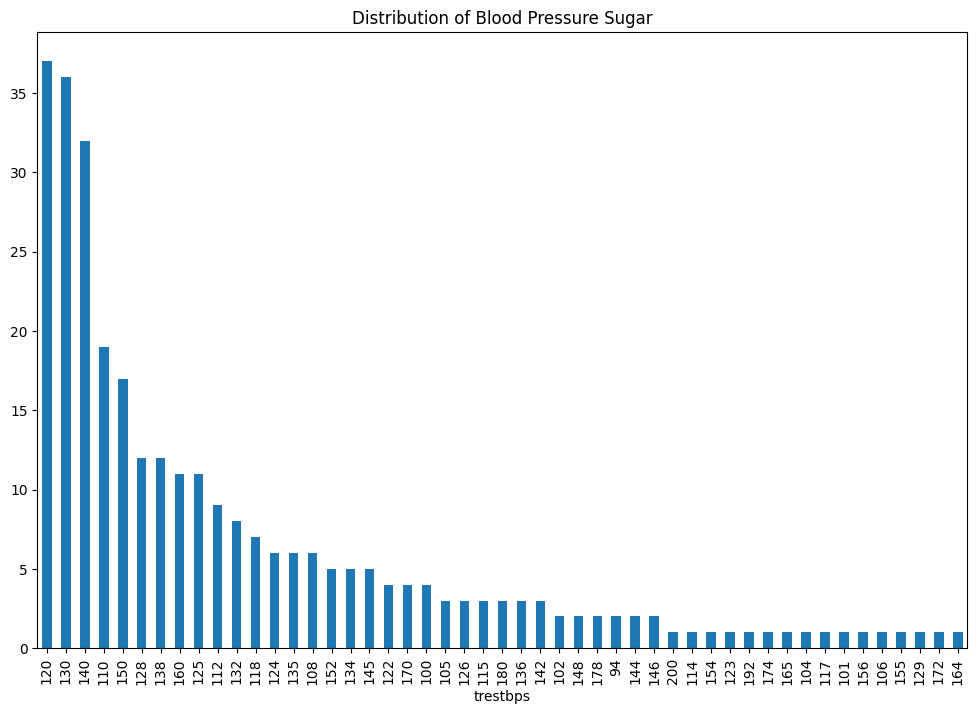

In [488]:
#Distribution of blood pressure sugar
plot.figure(figsize=(12,8))
df['trestbps'].value_counts().plot(kind='bar')
plot.title("Distribution of Blood Pressure Sugar")
plot.show()


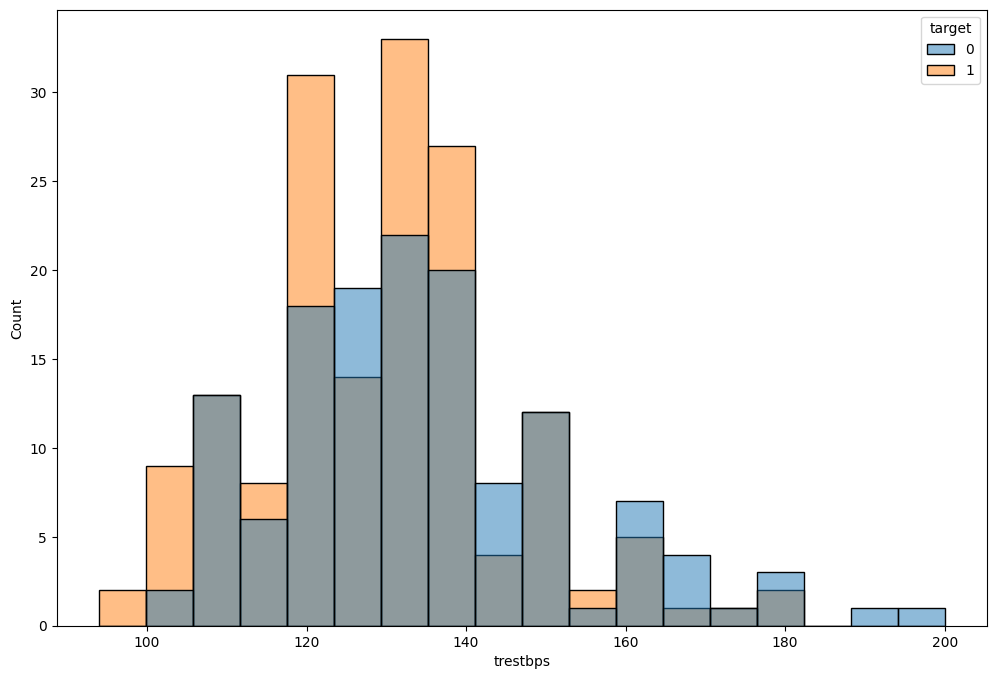

In [494]:
plot.figure(figsize=(12,8))
snb.histplot(x=df['trestbps'],hue='target', data=df)
plot.show()

From the above chart 120-140 has the highest cause of effection

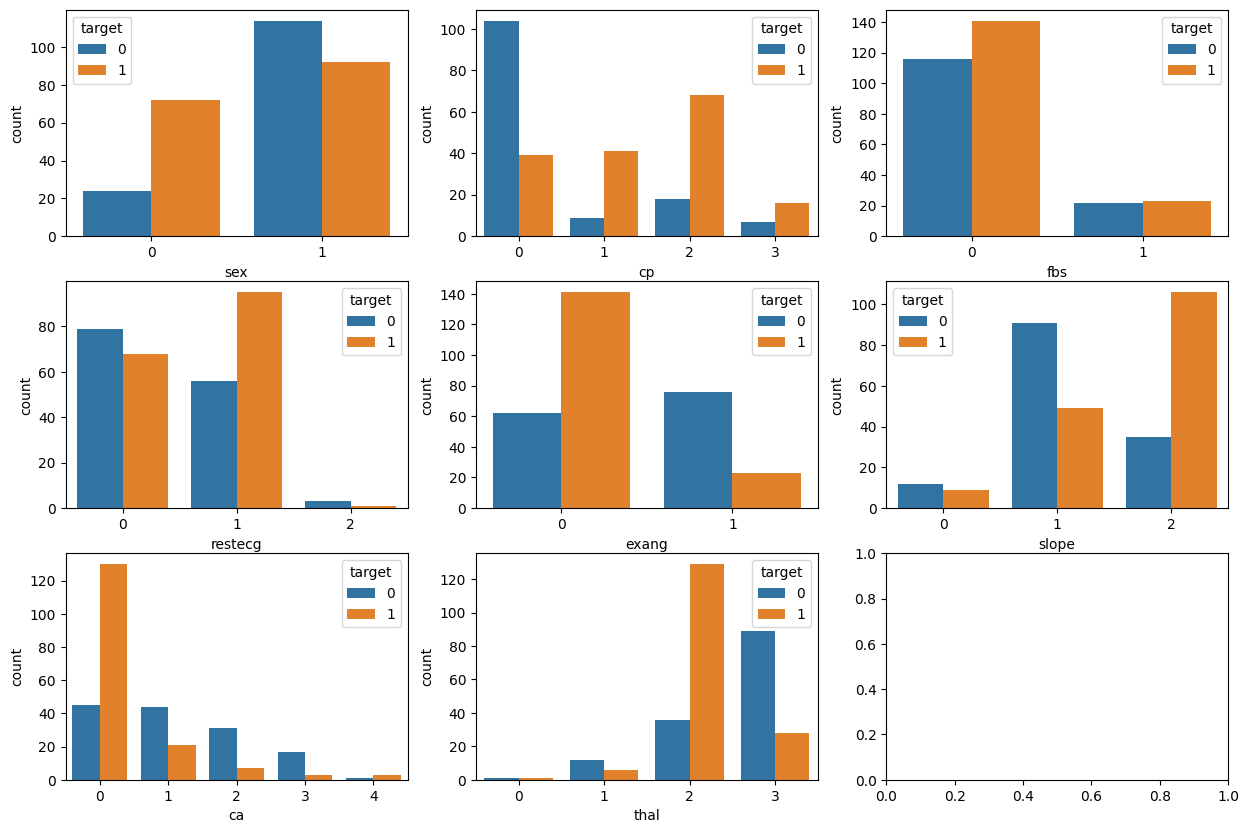

In [522]:
#Create a subplot to find all categorical to analysize along with the diseased and non-diseased
fig,axes=plot.subplots(nrows=3,ncols=3,figsize=(15,10))
cat_features=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
for idx,feature in enumerate(cat_features):
    if feature != 'target':
        ax=axes[int(idx/3),idx%3]
        snb.countplot(x=feature, hue='target',ax=ax,data=df)

    

In [524]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Performing EDA and Modeling:
1. Describe the relationship between cholesterol levels and our target variable.
2. What can be concluded about the relationship between peak exercising and occurrence of heart attack?
3. Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?
4. Use a pair plot to understand the relationship between all the given variables.
5. Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.


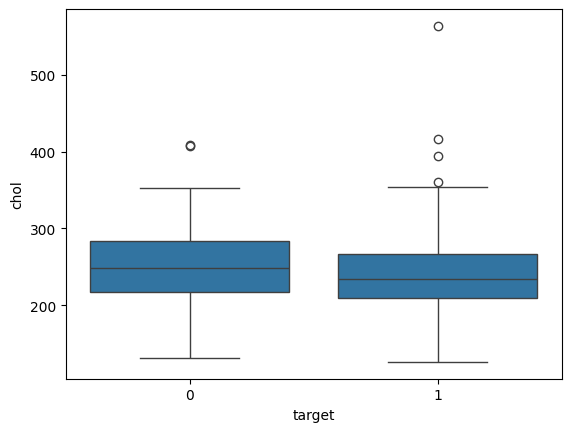

In [535]:
#RelationShip b/w chol vs target
snb.boxplot(y='chol',x='target', data=df)
plot.show()

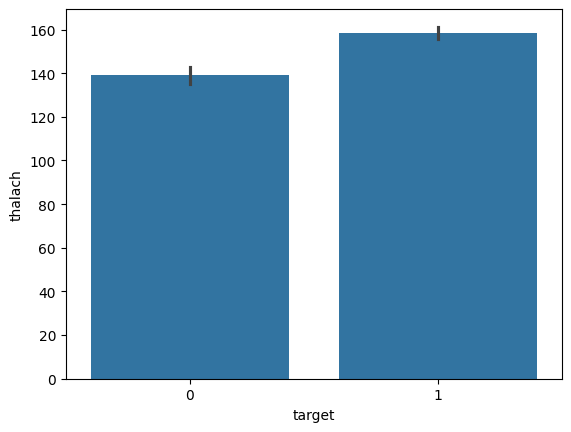

In [545]:
# relationship between peak exercising and occurrence of heart attack
snb.barplot(x='target',y='thalach',data=df)
plot.show()
#one with the heart attract has the highest thalach

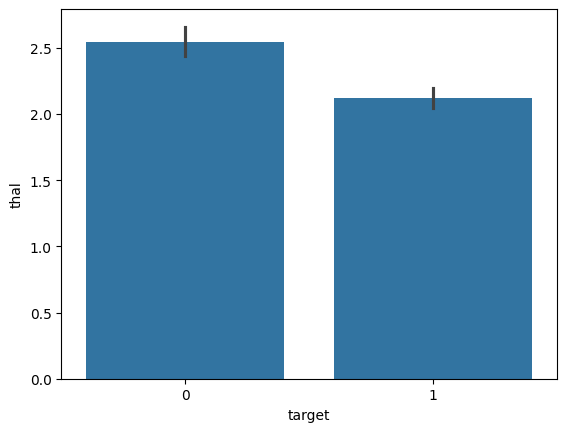

In [549]:
#thalassemia a major cause of CVD

snb.barplot(y='thal',x='target', data=df)
plot.show()

#form the picture it is clear that it is not a major cause of cvd

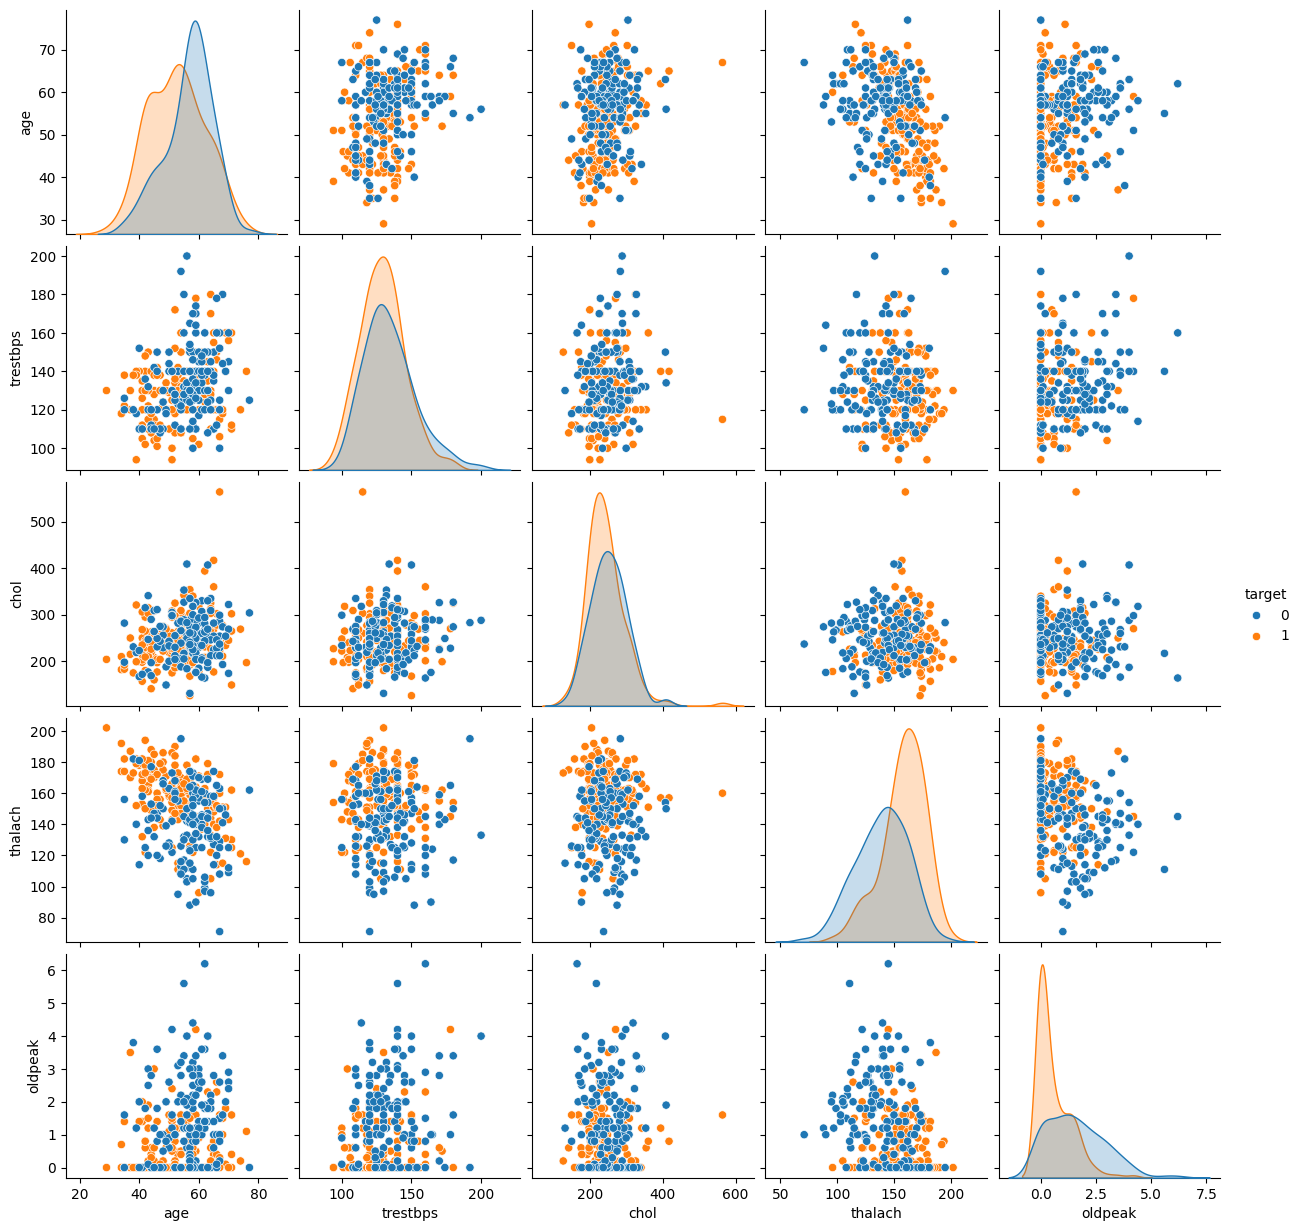

In [575]:
num_var=['age','trestbps','chol','thalach','oldpeak']
snb.pairplot(df[num_var+['target']],hue='target')
plot.show()

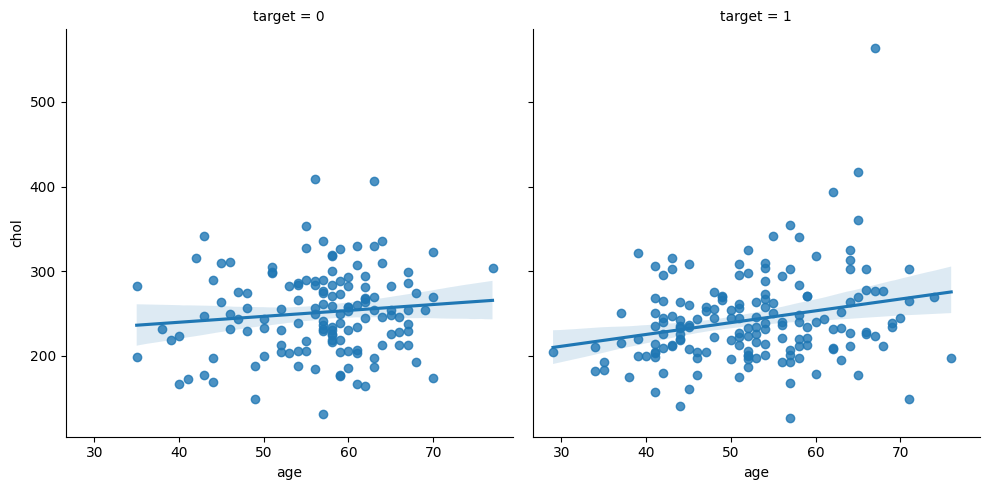

In [583]:
#create a plot to understand relationship between age & chol, according to target
snb.lmplot(x='age',y='chol',col='target',data=df)
plot.show()

#as you see above output the the heart patients are increasing by increasing the age

In [590]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Prepare data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(solver='liblinear', max_iter=1000)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[24  5]
 [ 5 27]]
Accuracy: 0.8360655737704918


The below one is my tableau Dashboard url from tableau public site

https://public.tableau.com/app/profile/tharun.mula/viz/HealthDomain/Dashboard1